#  Data Analysis From Titanic Data Sheet

## Data Contains the following features
- Survived
- Sex
- Embarked
- Pclass
- Age
- Fare
- SibSp
- Parch

### Categorical Features

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
Which features are numerical?

### Numerical Features

These values can be of different types, discrete, continous and time-series based; these values help us to plot specific graphs and analyse the data accordingly.

#### Continous: Age, Fare.
#### Discrete: SibSp, Parch.



In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
train_data=pd.read_csv(r"C:\Project1\train.csv")
test_data=pd.read_csv(r"C:\Project1\test.csv")
both=[train_data,test_data] 

In [3]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [4]:
train_data.head()




,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_data.info()
print('-'*50)
test_data.info()
test_data.iloc[152]



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         41

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


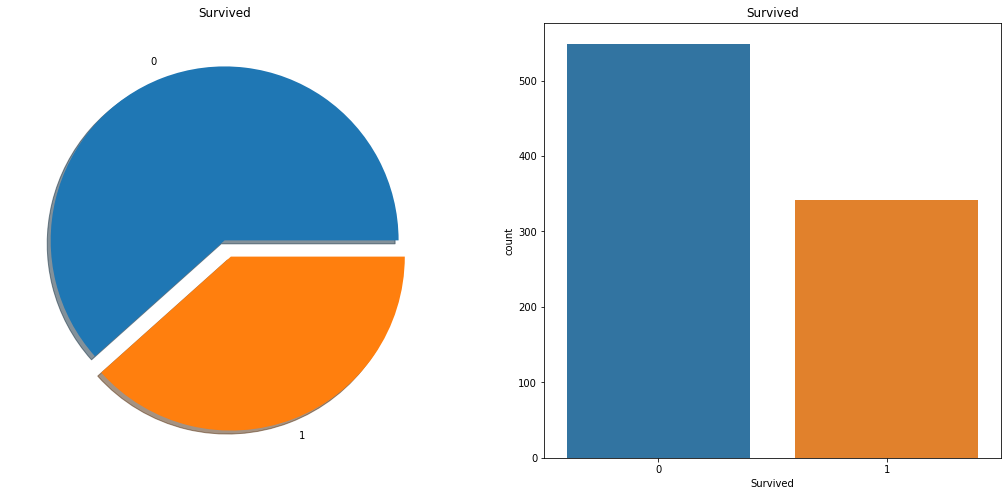

In [8]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['Survived'].value_counts().plot.pie(explode=[0,0.1],ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train_data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

**Evidently it is clear to us by now that only 38.4% of the total passengers have survived after the crash. We will now dig into more features that define the subject.**

In [9]:
train_data.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

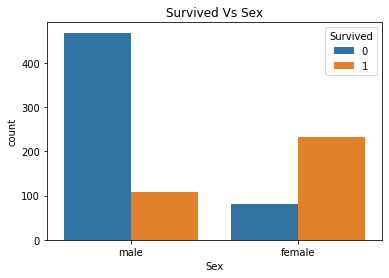

In [10]:
sns.countplot('Sex',hue='Survived',data=train_data)
plt.title("Survived Vs Sex")
plt.show()

## First categorical variable, gender
Shows that more female survived the crash then their male counterparts.
Its even ironic that we can see that males are nearly double than the females, but the data shows that male survived less in this crash, I think the females were to be the first ones to be resuced or the males gave them priorities as they were too proud to leave the crash soon. Being an alpha does not always pay, but what's there to lose, they got to be the heroes.


In [11]:
pd.crosstab(train_data.Pclass,train_data.Survived,margins=True,).style.background_gradient(cmap='Blues_r')


Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


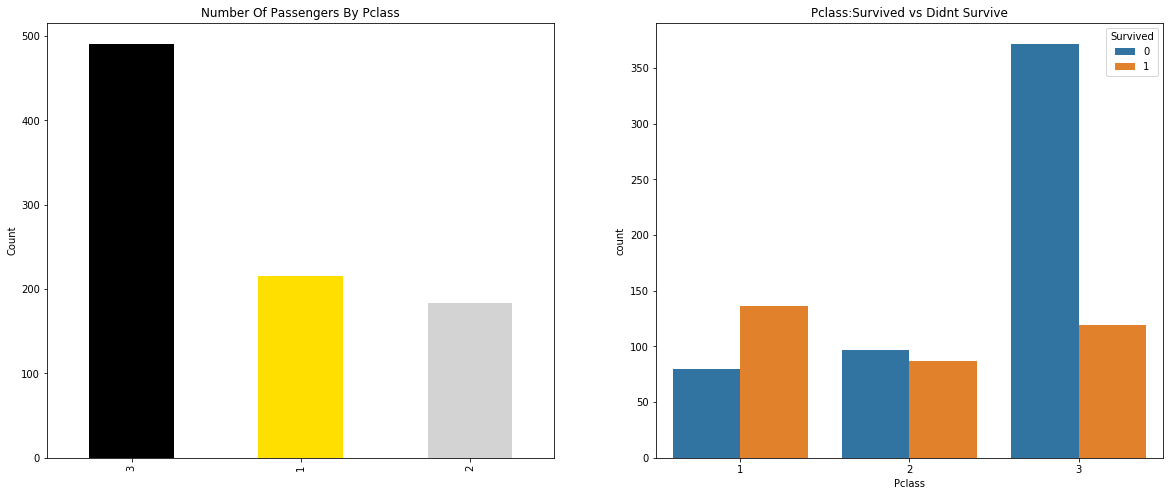

In [12]:
f,ax=plt.subplots(1,2,figsize=(20,8))
train_data['Pclass'].value_counts().plot.bar(color=['#000000','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train_data,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Didnt Survive')
plt.show()

__We can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 was a lot higher they did not survive like the high class ticket holders.So money and status matters. We come from a materialistic history__ 

C:\Users\aashi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


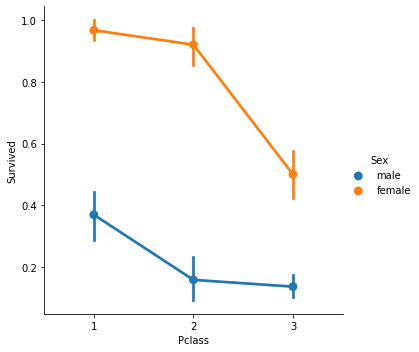

In [13]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train_data)
plt.show()

## Conclusions from Pclass comparisions
- Most of the passengers had a Third class ticket it shows that most of them were budget travellers, such a bad day for them.
- Pclass1, or the first class ticket holders were most likely to survive, it might be because they got the life-saving gears sooner than the other passengers or they were rescued first.
- If the passenger is a female and she had First class ticket, it's likely that she survives around 95% of the time. It looks like men did their best to save females as a whole, plus they did prefer the rich ladies.
- It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.

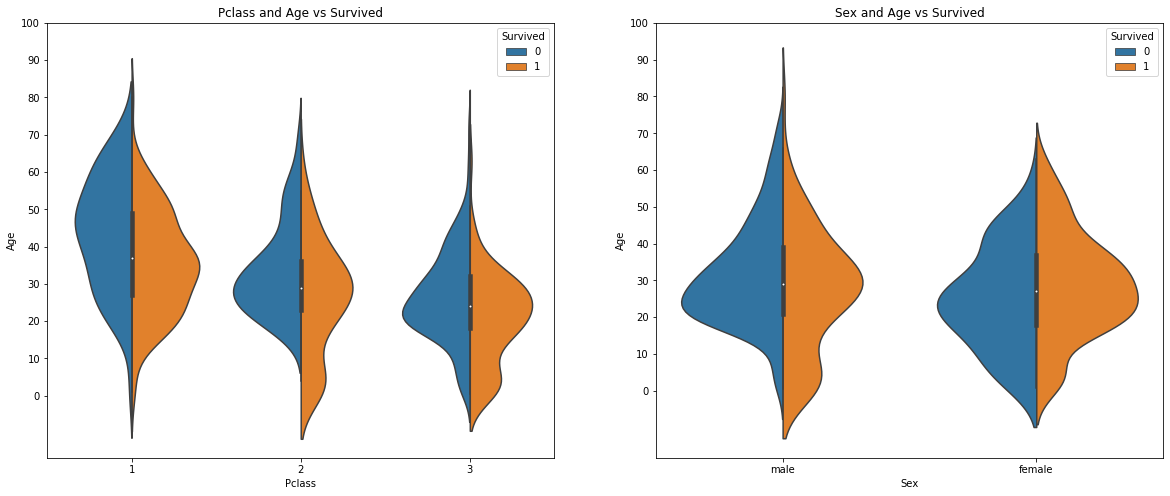

In [14]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train_data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train_data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

## Observations:
- The number of children increases with Pclass and the survival rate for passenegers below Age 10(i.e children) looks to be good irrespective of the Pclass.

- Survival chances for Passenegers aged 20-50 from Pclass1 is high and is even better for Women.

- For males, the survival chances decreases with an increase in age.

# Categorical Feature : Embarkment 

In [15]:
pd.crosstab([train_data.Embarked,train_data.Pclass],[train_data.Sex,train_data.Survived],margins=True).style.background_gradient(cmap='summer_r')


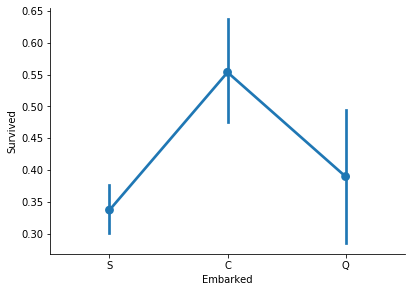

In [16]:
sns.factorplot('Embarked','Survived',data=train_data)
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

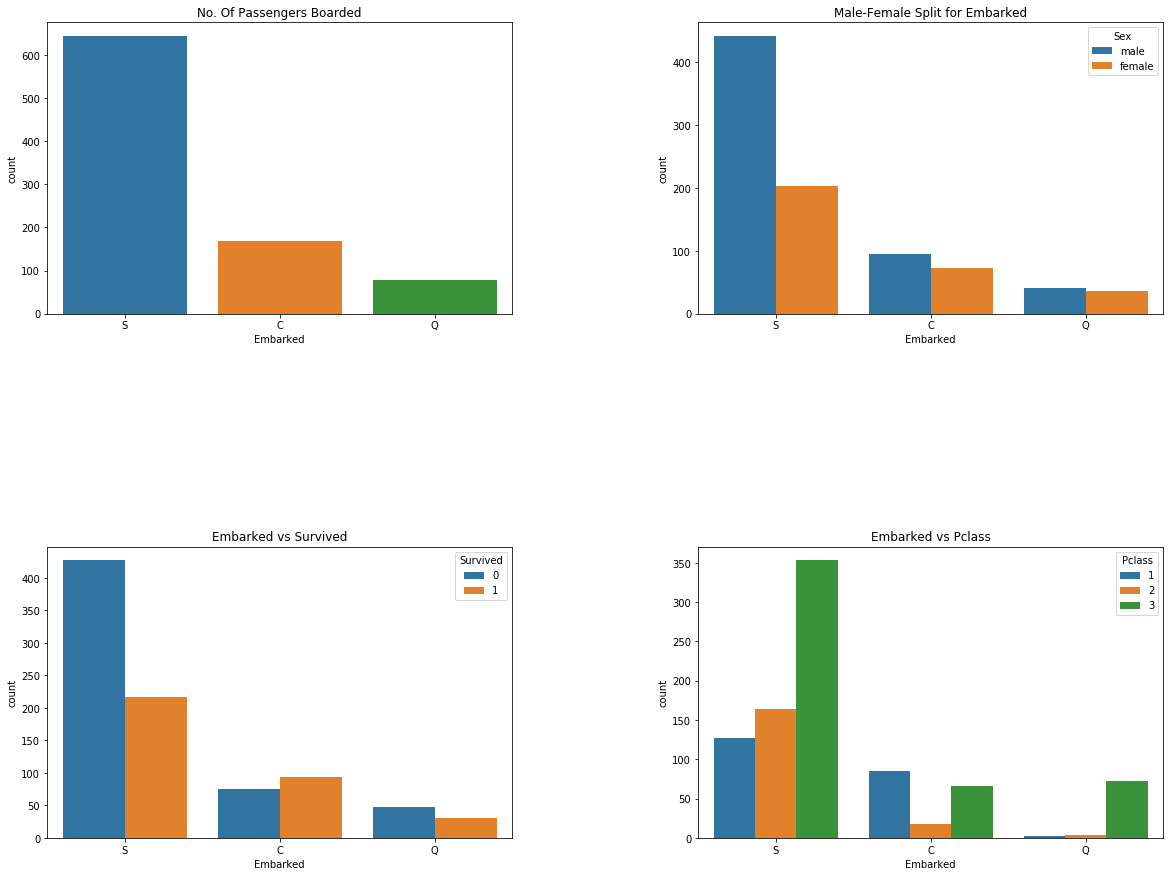

In [17]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=train_data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train_data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train_data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train_data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.4,hspace=0.8)
plt.show()


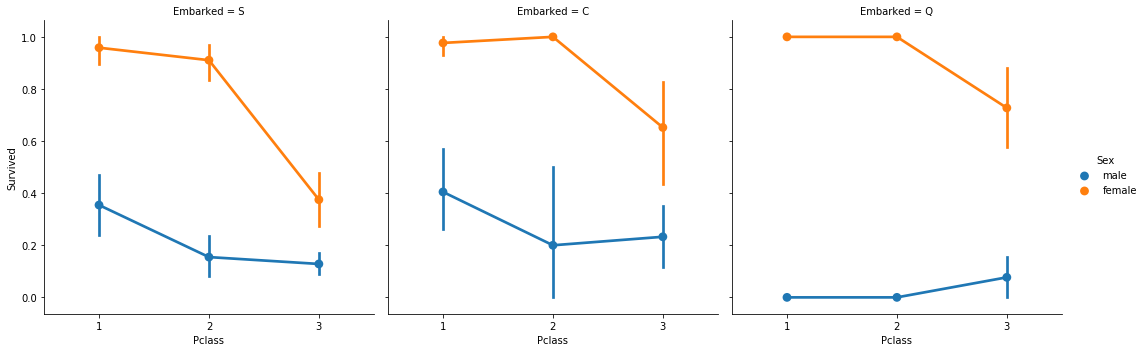

In [18]:
sns.factorplot('Pclass','Survived',hue='Sex',col='Embarked',data=train_data)
plt.show()


## Observations
- The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the embarked port.

- Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is low.

- Port Q looks to be unlukiest for Men, as almost all were from Pclass 3.

- Maximum passengers boarded from S. Majority of them being from Pclass3.

- The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass1 and Pclass2 Passengers.
    - Port C can be at such a point that when the passengers board they can be in such a place in the ship where it makes them easy to get rescued or they fall in the ocean where it can be a easy rescue.

- The Port S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3  didn't survive.

- Port Q had almost 95% of the passengers were from Pclass3.


#### Addtion of a new feature to generalise the behavior of data. It is to notice that title or the initials of the passengers end with a ".". The ages of the passengers given as NaN now can be assinged as a mean age, but the problem of wrong assignment can be evident. Can a four year old boy be assigned with the mean age of 29?. Due to this reason categorising the data into the age bands by looking at the initials can come in handy. 
### It is now easier for us to categorise the data looking at the initials and then draw conclusions.

In [19]:
for dataset in both:
    dataset['Initial'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_data['Initial'], train_data['Sex'])


Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


#### Lets, now change some initials to more generalised and their more likely to fall category.

In [20]:
for dataset in both:
    dataset['Initial'] = dataset['Initial'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Initial'] = dataset['Initial'].replace('Mlle', 'Miss')
    dataset['Initial'] = dataset['Initial'].replace('Ms', 'Miss')
    dataset['Initial'] = dataset['Initial'].replace('Mme', 'Mrs')
    
train_data[['Initial', 'Survived']].groupby(['Initial'], as_index=False).mean()

,Initial,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


## Conclusions:
- Data concurrs to the above made claims as a middle aged female has the highest probability of living or, generally, a young person is more likely to live, as both master and miss have more than 50% chance of surviving the crash.

In [21]:
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mr'),'Age']=33
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Mrs'),'Age']=36#now lets fill the NaN ages with the mean ages of a certain age band
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Master'),'Age']=5
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Miss'),'Age']=22
train_data.loc[(train_data.Age.isnull())&(train_data.Initial=='Other'),'Age']=46
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mr'),'Age']=33
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Mrs'),'Age']=36#now lets fill the NaN ages with the mean ages of a certain age band
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Master'),'Age']=5
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Miss'),'Age']=22
test_data.loc[(test_data.Age.isnull())&(test_data.Initial=='Other'),'Age']=46

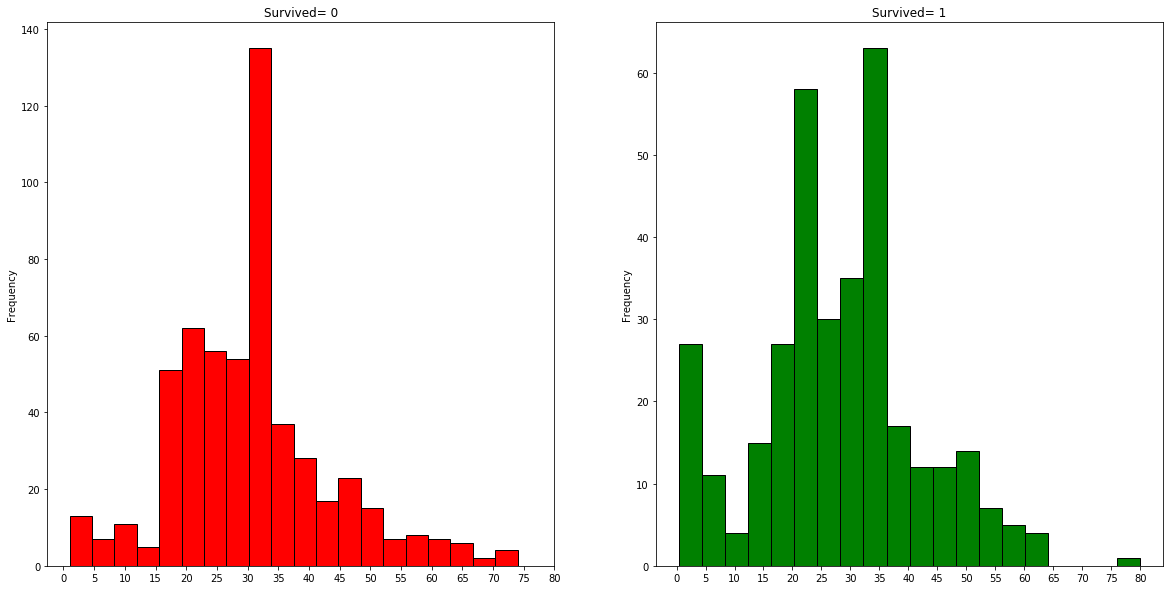

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train_data[train_data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train_data[train_data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

## Observations:
- The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

- The oldest Passenger was saved(80 years).

- Maximum number of deaths were in the age group of 30-40

In [23]:
train_data.groupby('Initial')['Age'].mean() #lets check the average age by Initials
#now lets fill the NaN ages with the mean ages of a certain age band


Initial
Master     4.616750
Miss      21.875676
Mr        32.513540
Mrs       35.817460
Rare      45.545455
Name: Age, dtype: float64

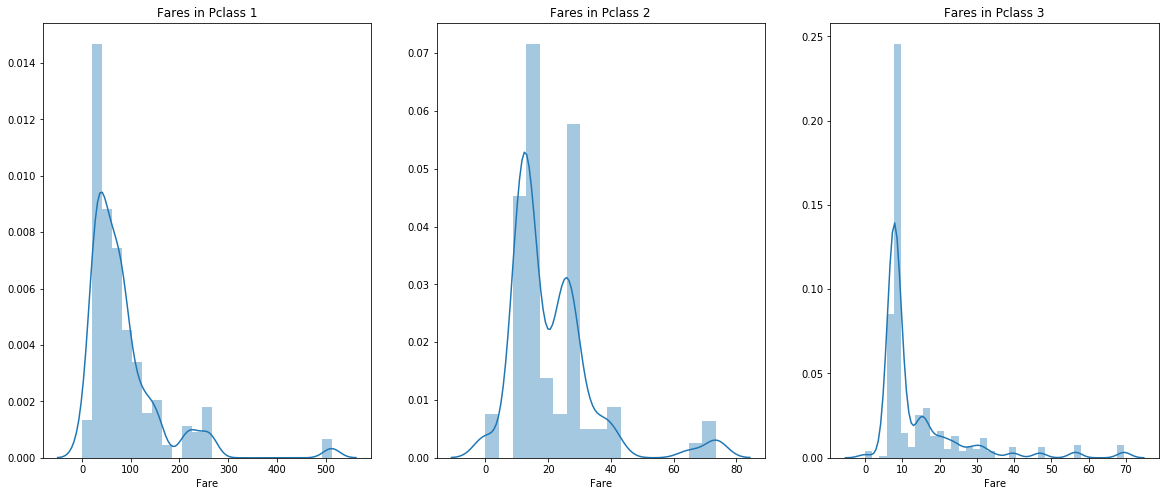

In [24]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_data[train_data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_data[train_data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. 


As most of the passengers boarded from Port S, it is now time to replace the NaN values of Embarkment with port S.

In [25]:
train_data['Embarked'].fillna('S',inplace=True)


## SibSip
- Discrete Feature
    - This feature represents whether a person is alone or with his family members.

**Sibling = brother, sister, stepbrother, stepsister**

**Spouse = husband, wife**
**Now, let's look at what having a sibling or traveling with a spouse had to do with the survival rates.**


In [26]:
pd.crosstab(train_data.SibSp,train_data.Survived).style.background_gradient(cmap='summer_r')


Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


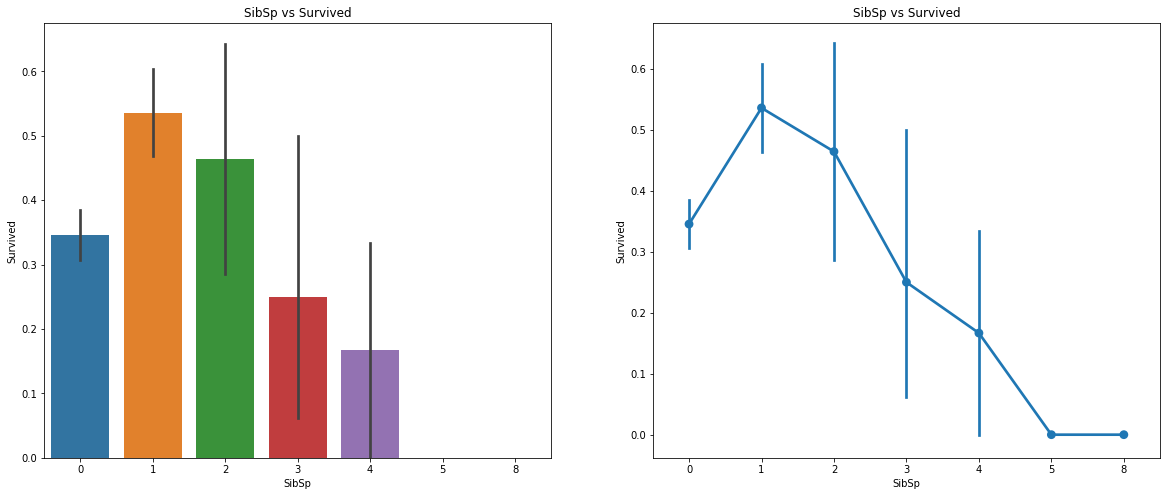

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=train_data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp','Survived',data=train_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close()
plt.show()

### *The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?* ##



In [28]:
pd.crosstab(train_data.Parch,train_data.Pclass).style.background_gradient(cmap='summer_r')


Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


## _The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died._ ##

# Another discrete feature Parch(Parents/Children)


* First let's take a look at the crosstab between Parch and and ticket class.

In [29]:
pd.crosstab(train_data.Parch,train_data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


**The Crosstab again shows that the larger families were in Pclass 3. This drives to the conclusion that a householder had to pay for the entire family, so to the range $0-$512 in ticket fares. Furthermore, this again shows that the ticket class had a lot to do with the survival rates of the passengers.** *No one got a free ride!!!*

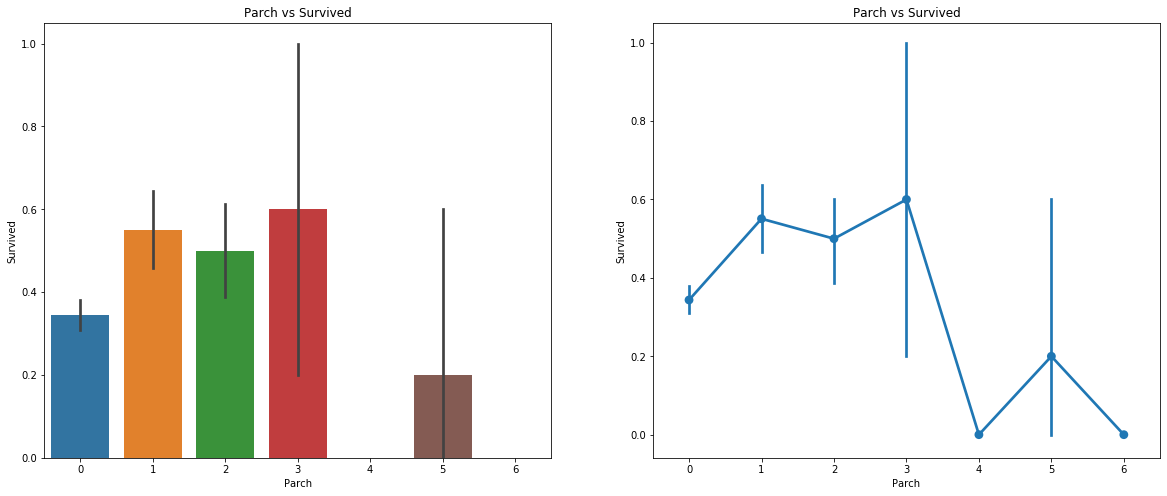

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('Parch','Survived',data=train_data,ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.factorplot('Parch','Survived',data=train_data,ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

# Observations:
- Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

 - The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.
      - This data is quite reasonable as if there are more number of family members there could be a lot of scene as parents wanting to save their children and such, so more number could have created confusion and a lot of drama, so a small family could have saved themselves rather than a pretty large family.

# Fare : Continuous Feature
- From the data description above the fare ranges from as low as $0 to as high as $512, this could have been due to the main householder or any sort of family deals available in the maiden voyage, as there is ridiculously large pay for someone, and for someone this is quite a high pay. 
## Now, let's look at Fares for the different ticket classes.


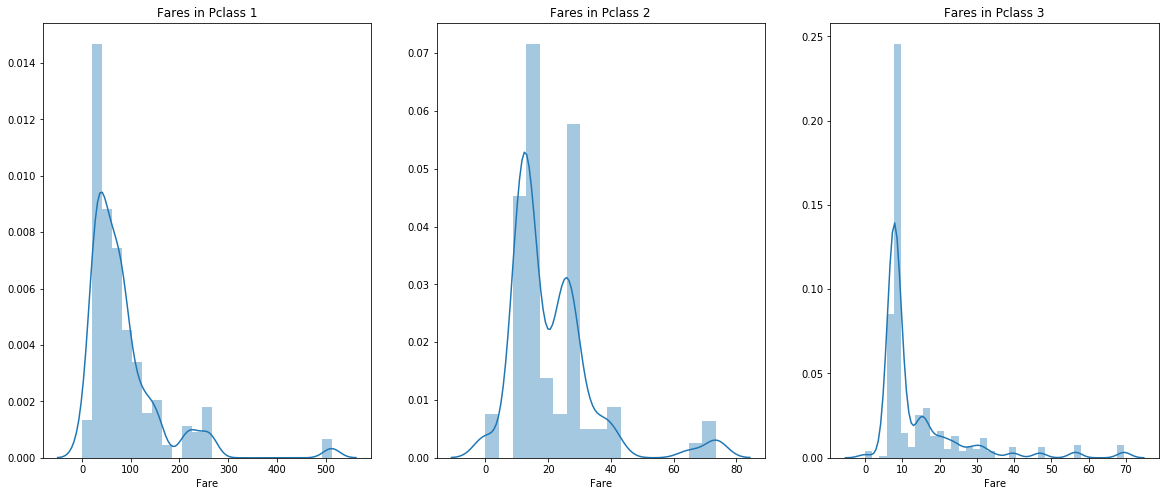

In [31]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train_data[train_data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train_data[train_data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train_data[train_data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

# Observations
*There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.*

# Correlation between the data
- A heatmap to be made to analyse the correlation between various data.

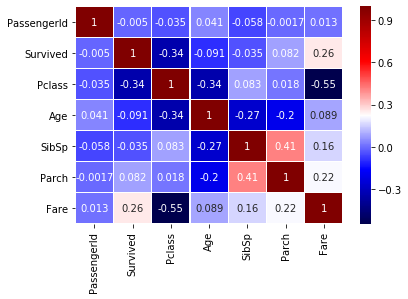

In [32]:
sns.heatmap(train_data.corr(),annot=True,cmap='seismic',linewidths=0.2) #data.corr()-->correlation matrix
plt.gcf()
fig.set_size_inches(10,8)
plt.show()


# Here the heatmap interprets:
            ##Heatmap key: Red colour corresponds positive correlation, Blue colour corresponds negative correlation##
- Without including the key points concentration, there is the highest posivite correlation Parch and Sbsp, these features seem to be incresing with respect to one another, as they both constitute the family size.            

In [33]:
train_data['Normalised Age']=round((train_data['Age'])/train_data['Age'].max(),3)
train_data['Normalised Age']
test_data['Normalised Age']= round((test_data['Age'])/test_data['Age'].max(),3)


In [34]:
train_data['Normalised Age'].max()

            

1.0

In [35]:
train_data['Normalised Age'].value_counts().to_frame().style.background_gradient(cmap='summer')#

,Normalised Age
0.412,134
0.275,63
0.45,39
0.3,30
0.225,26
0.375,25
0.238,25
0.35,25
0.262,24
0.312,23


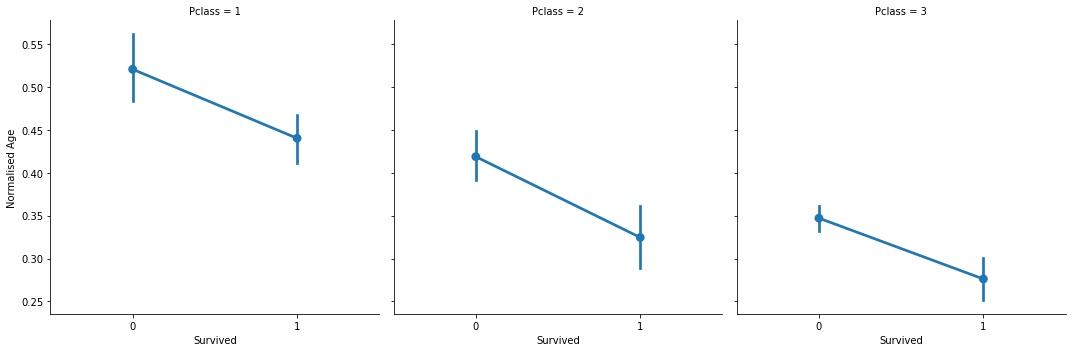

In [36]:
sns.factorplot('Survived','Normalised Age',data=train_data,col='Pclass')
plt.gcf()
plt.show()

**the survival rate decreases as the age increases irrespective of the Pclass.**

### Creating a new feature, family size

In [37]:
train_data['Family_Size']=0
train_data['Family_Size']=train_data['Parch']+train_data['SibSp']#family size
train_data['Alone']=0
train_data.loc[train_data.Family_Size==0,'Alone']=1
test_data['Family_Size']=0
test_data['Family_Size']=test_data['Parch']+test_data['SibSp']#family size
test_data['Alone']=0
test_data.loc[test_data.Family_Size==0,'Alone']=1
train_data[['Family_Size', 'Survived']].groupby(['Family_Size'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Family_Size,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [38]:
train_data[['Alone', 'Survived']].groupby(['Alone'], as_index=False).mean()

,Alone,Survived
0,0,0.505650
1,1,0.303538


**Chances of survival is very low if the person is travelling alone without his family.**


C:\Users\aashi\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


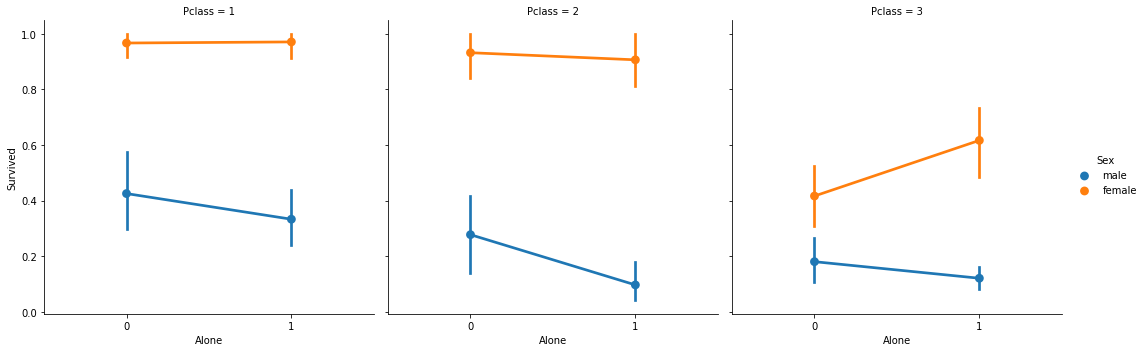

In [39]:
sns.factorplot('Alone','Survived',data=train_data,hue='Sex',col='Pclass')
plt.show()

**It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.**

In [40]:
train_data.Fare.max()

512.3292

In [41]:
train_data.Fare.min()

0.0

In [42]:
train_data["Normalised Fare"]=round(train_data['Fare']/train_data['Fare'].max(),3)
test_data["Normalised Fare"]=round(test_data['Fare']/test_data['Fare'].max(),3)

In [43]:
train_data['Normalised Fare']

0      0.014
1      0.139
2      0.015
3      0.104
4      0.016
5      0.017
6      0.101
7      0.041
8      0.022
9      0.059
10     0.033
11     0.052
12     0.016
13     0.061
14     0.015
15     0.031
16     0.057
17     0.025
18     0.035
19     0.014
20     0.051
21     0.025
22     0.016
23     0.069
24     0.041
25     0.061
26     0.014
27     0.513
28     0.015
29     0.015
       ...  
861    0.022
862    0.051
863    0.136
864    0.025
865    0.025
866    0.027
867    0.099
868    0.019
869    0.022
870    0.015
871    0.103
872    0.010
873    0.018
874    0.047
875    0.014
876    0.019
877    0.015
878    0.015
879    0.162
880    0.051
881    0.015
882    0.021
883    0.020
884    0.014
885    0.057
886    0.025
887    0.059
888    0.046
889    0.059
890    0.015
Name: Normalised Fare, Length: 891, dtype: float64

In [44]:
train_data['Normalised Fare'].max()

1.0

In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                418 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               417 non-null float64
Cabin              91 non-null object
Embarked           418 non-null object
Initial            418 non-null object
Normalised Age     418 non-null float64
Family_Size        418 non-null int64
Alone              418 non-null int64
Normalised Fare    417 non-null float64
dtypes: float64(4), int64(6), object(6)
memory usage: 52.3+ KB


In [46]:
train_data['Normalised Fare'].value_counts().to_frame().style.background_gradient(cmap='summer')#

,Normalised Fare
0.015,157
0.014,59
0.016,51
0.025,44
0.051,44
0.02,27
0.028,20
0.031,19
0.017,19
0.019,17


**Here it is seen that some of the values are not numerical, so for us to compare them, first we have to convert them into numeric values.**

In [47]:
train_data['Sex'].replace(['male','female'],[0,1],inplace=True)
train_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in both:
    dataset['Initial'] = dataset['Initial'].map(title_mapping)
    dataset['Initial'] = dataset['Initial'].fillna(0)

train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Normalised Age,Family_Size,Alone,Normalised Fare
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0.275,1,0,0.014
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3,0.475,1,0,0.139
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,0.325,0,1,0.015
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3,0.438,1,0,0.104
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1,0.438,0,1,0.016


# Dropping unrequired values
**Since we have no use of the values like Cabin, Fare, Age, Name, PassengerID**
## Now we drop them!! 

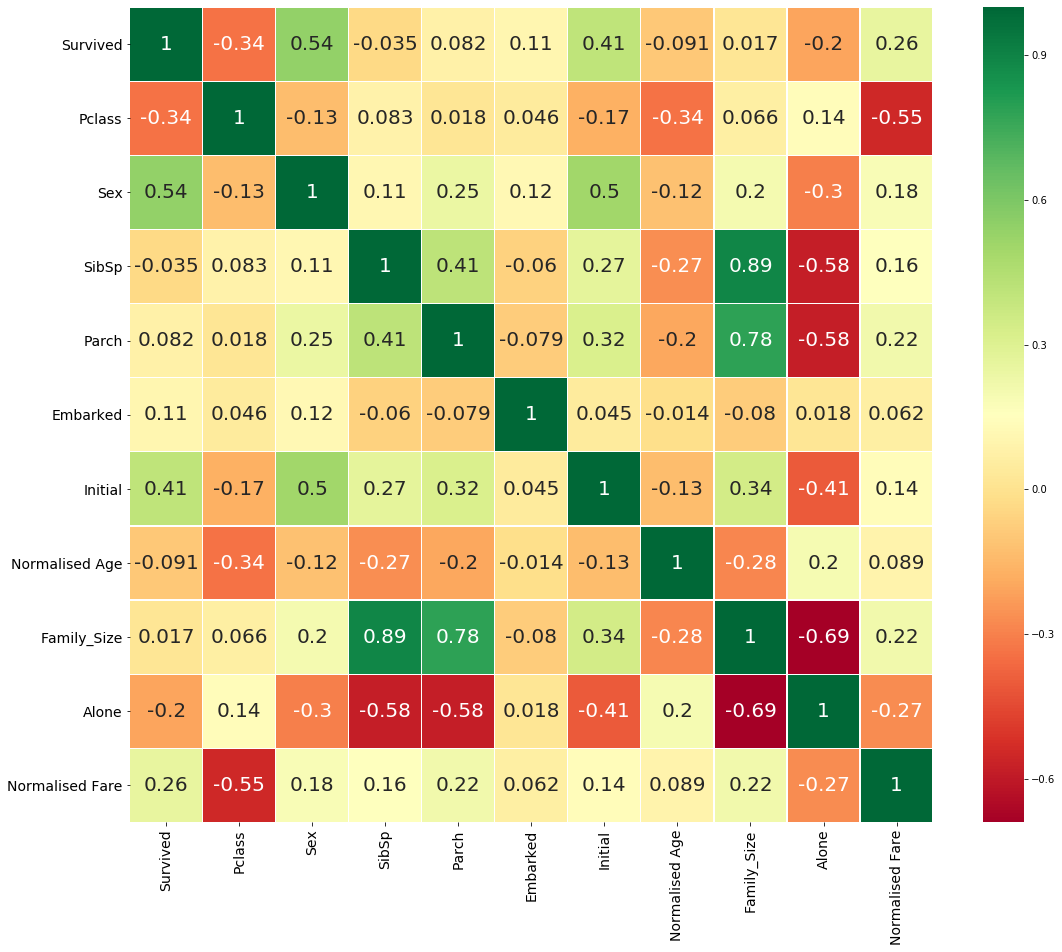

In [48]:
train_data.drop(['Cabin','Fare', 'Ticket','Age','Name','PassengerId'], axis=1, inplace=True)
test_data.drop(['Cabin','Fare', 'Ticket','Age','Name','PassengerId'], axis=1, inplace=True)
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

**Now the above correlation plot, we can see some positively related features. Some of them being SibSp andd Family_Size and Parch and Family_Size and some negative ones like Alone and Family_Size.**
# Since Parch and SibSp has been covered by the Familysize and Alone features, let's drop them too.



In [49]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived           891 non-null int64
Pclass             891 non-null int64
Sex                891 non-null int64
SibSp              891 non-null int64
Parch              891 non-null int64
Embarked           891 non-null int64
Initial            891 non-null int64
Normalised Age     890 non-null float64
Family_Size        891 non-null int64
Alone              891 non-null int64
Normalised Fare    891 non-null float64
dtypes: float64(2), int64(9)
memory usage: 76.6 KB


In [50]:
test_data['Sex'].replace(['male','female'],[0,1],inplace=True)
test_data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
test_data['Normalised Fare'].fillna(test_data['Normalised Fare'].dropna().median(), inplace=True)
train_data['Normalised Fare'].fillna(0.28000, inplace=True)
train_data['Normalised Age'].fillna(train_data['Normalised Age'].dropna().mean(), inplace=True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass             418 non-null int64
Sex                418 non-null int64
SibSp              418 non-null int64
Parch              418 non-null int64
Embarked           418 non-null int64
Initial            418 non-null int64
Normalised Age     418 non-null float64
Family_Size        418 non-null int64
Alone              418 non-null int64
Normalised Fare    418 non-null float64
dtypes: float64(2), int64(8)
memory usage: 32.7 KB


# Predictive modelling
- Now, as we have the required numerical values, we will now dig into prediction using known algorithms.

In [51]:
test_data.head()

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Normalised Age,Family_Size,Alone,Normalised Fare
0,3,0,0,0,2,1,0.454,0,1,0.015
1,3,1,1,0,0,3,0.618,1,0,0.014
2,2,0,0,0,2,1,0.816,0,1,0.019
3,3,0,0,0,0,1,0.355,0,1,0.017
4,3,1,1,1,0,3,0.289,2,0,0.024


In [52]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm
from sklearn import metrics 
from sklearn.model_selection import train_test_split


In [59]:

train,test=train_test_split(train_data,test_size=0.3)
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train_data[train_data.columns[1:]]
Y=train_data['Survived']


In [60]:
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('The accuracy of the Logistic Regression is',(metrics.accuracy_score(prediction1,test_Y))*100)

The accuracy of the Logistic Regression is 82.83582089552239


C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)#radial support vector machines
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('The accuracy of the Logistic Regression is',(metrics.accuracy_score(prediction2,test_Y))*100)

The accuracy of the Logistic Regression is 82.83582089552239


C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
model=svm.SVC(kernel='linear',C=1,gamma=0.1)#linear support vector machines
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',(metrics.accuracy_score(prediction3,test_Y))*100)


The accuracy of the Logistic Regression is 82.08955223880598


C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Radial Svm','Linear Svm','Logistic Regression'] 
models=[svm.SVC(kernel='rbf'),svm.SVC(kernel='linear'),LogisticRegression()]
for model in models:
    cv_result = cross_val_score(model,X,Y, cv = kfold, scoring='f1')
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2


C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\aashi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

,CV Mean,Std
Radial Svm,0.754050,0.058656
Linear Svm,0.755779,0.056721
Logistic Regression,0.738439,0.060770


In [64]:
X


,Pclass,Sex,SibSp,Parch,Embarked,Initial,Normalised Age,Family_Size,Alone,Normalised Fare
0,3,0,1,0,0,1,0.275,1,0,0.014
1,1,1,1,0,1,3,0.475,1,0,0.139
2,3,1,0,0,0,2,0.325,0,1,0.015
3,1,1,1,0,0,3,0.438,1,0,0.104
4,3,0,0,0,0,1,0.438,0,1,0.016
5,3,0,0,0,2,1,0.412,0,1,0.017
6,1,0,0,0,0,1,0.675,0,1,0.101
7,3,0,3,1,0,4,0.025,4,0,0.041
8,3,1,0,2,0,3,0.338,2,0,0.022
9,2,1,1,0,1,3,0.175,1,0,0.059


In [ ]:
test_data.info()

In [ ]:
test_data.describe()